# Artificial Neural Networks
In this exercise, several parts of the code are missing, which should be completed by you. 

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import sklearn
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn.metrics import accuracy_score
sns.set()

%matplotlib inline

## MLP for Skin disease dataset using `scikit-learn`

Now let us apply a neural network on the skin disesase data. To reduce the training time we reduce the amount of data in our dataset.

In [5]:
df = pd.read_csv("skin_disease.csv")
df = df.sample(frac=1)
df = df.iloc[0:100000]
df.head()

,class,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
399763,0,0.0,1.0,147.006546,143.778107,154.446762,0.683331,1.200395,4.162486,0.342579,0.438565,-1.637385,0.931025,1.535766,5.316552
179351,0,0.0,1.0,148.038666,141.652588,151.419388,1.005779,0.772486,3.608217,-0.598483,0.419350,1.930153,1.399444,1.031002,4.742771
489030,1,0.0,1.0,146.840973,140.802795,138.360687,1.595206,2.676929,5.883652,-1.607611,-2.674804,5.202581,2.284131,3.653879,8.494467
225829,0,0.0,1.0,146.447952,145.673996,125.780487,1.557866,2.570986,6.929062,-1.375071,-2.344707,6.854708,2.102766,3.587329,10.010593
243109,1,0.0,1.0,145.647827,146.265915,159.128494,0.985775,1.698258,5.269435,-0.727311,-1.214882,-4.540771,1.268871,2.254031,7.528327


In [6]:
X = df.drop(columns=["class"])
y = df["class"]

> Split the data into a train and test set. Use 40% of the data for the test set.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

We define our Multi Layer Perceptron with 2 hidden layers. This time we use the [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) implementation from Scikit-Learn.

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(30,15),
                    activation='relu',  # activation function
                    solver='adam',  # optimizer
                    batch_size=1024)  # size of minibatches

> Train the neural network on `X_train`, `y_train` and plot the loss by accessing the attribute `loss_curve_`.

In [11]:
def plot_costs(costs):
    fig, ax = plt.subplots()
    ax.plot(costs)
    ax.set_title("Loss curve")
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


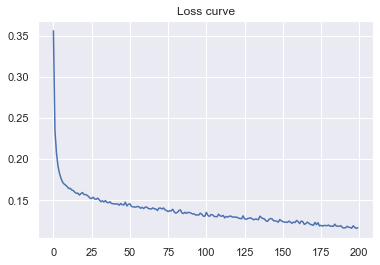

In [8]:
mlp.fit(X_train, y_train)
plot_costs(mlp.loss_curve_)

In [ ]:
mlp.fit(X_train, y_train)
plot_costs(mlp.loss_curve_)

> Implement your own predict function. For that we'll need an activation function for the hidden layers, in our case `relu` and for the output layer `sigmoid`.

In [9]:
def relu(x):
    ### START YOUR CODE ###
    return np.maximum(0, x)
    #if x > 0:
    #    return x
    #else:
    #    return 0
    ### END YOUR CODE ###
    pass

In [ ]:
def relu(x):
    return np.maximum(0, x)

In [12]:
def sigmoid(x):
    ### START YOUR CODE ###
    return (1/(1+np.exp(-x)))
    ### END YOUR CODE ###
    pass

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
def predict(mlp, X):
    ### START YOUR CODE ###
    A = X
    
    # forward propagate through layers
    for i, (W, B) in enumerate(zip(mlp.coefs_, mlp.intercepts_)):
        z = A.dot(W) + B
        # if hidden layer, apply `relu`
        if i != mlp.n_layers_ - 2:
            A = relu(z)
            
    # last layer output activation `sigmoid`
    out = sigmoid(z)  
    # transform to 1-D and threshold
    out = np.squeeze(out)
    out = np.array(out > 0.5, dtype=int)
    
    return out
    ### END YOUR CODE ###
    
    pass

In [ ]:
def predict(mlp, X):
    # define the first activations, e.g. inputs
    A = X
    
    # forward propagate through layers
    for i, (W, B) in enumerate(zip(mlp.coefs_, mlp.intercepts_)):
        z = A.dot(W) + B
        # if hidden layer, apply `relu`
        if i != mlp.n_layers_ - 2:
            A = relu(z)
            
    # last layer output activation `sigmoid`
    out = sigmoid(z)  
    # transform to 1-D and threshold
    out = np.squeeze(out)
    out = np.array(out > 0.5, dtype=int)
    
    return out

> Test your implementation with the scikit-learn predict function.

In [15]:
y_pred_scikit = mlp.predict(X_test)
y_pred_own = predict(mlp, X_test.values)

print('Are the outputs the same: %s' % (y_pred_scikit == y_pred_own).all() )

Are the outputs the same: True


In [ ]:
y_pred_scikit = mlp.predict(X_test)
y_pred_own = predict(mlp, X_test.values)

print('Are the outputs the same: %s' % (y_pred_scikit == y_pred_own).all())

> Predict the values on the test set and calculate the accuracy and the f1-score.

In [16]:
y_pred = predict(mlp, X_test.values)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: %.4f" % accuracy)
print("F1: %.4f" % f1)

Accuracy: 0.9568
F1: 0.7548


In [ ]:
y_pred = predict(mlp, X_test.values)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: %.4f" % accuracy)
print("F1: %.4f" % f1)

## MLP for Skin disease dataset using `TensorFlow`
In practice, the MLP from `scikit-learn` is never used because of the lack of customisation and the absence of GPU training. `TensorFlow` is a library specialised in deep learning and therefore also has implementations for advanced techniques. Thus the section below is a quick introduction to how the same network can be implemented using `TensorFlow`. The networks' results do not need to be the same, since as mentioned above, the `scikit-learn` implementation can not be as customised as the `TensorFlow` one. 

If `TensorFlow` is not already installed on the environment, it can be done using the "magic" cell from below. If it is already installed, make sure to use version `2.3.1`. Higher versions should also work but weren't tested.

In [20]:
!pip install tensorflow==2.3.1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.1
ERROR: No matching distribution found for tensorflow==2.3.1


In [2]:
import tensorflow as tf

#assert tf.__version__ == '2.3.1'
print(tf.__version__)

2.1.0


A model in `TensorFlow` can be implemented using the `Sequential API`, which enables for easy extensibility by calling `.add()`. To implement the same MLP as above, we can sequentially add `Dense` layers to the model. Here the customization possibilities compared to `scikit-learn` is evident. For example, the activation function can be set for each layer separately, which was impossible before.

In [8]:
dataset_dim = X_train.shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(30, input_shape=(dataset_dim, ), activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________


After defining the model, it needs to be compiled using an optimizer and loss function. In our case, we'll use adam as optimizer and binary cross-entropy as loss. Now the model can be trained by specifying the number of epochs and the batch size. 

In [9]:
adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=1024, epochs=150) 

Train on 60000 samples
Epoch 1/150
60000/60000 [==============================] - 0s 5us/sample - loss: 1.3811 - accuracy: 0.8139
Epoch 2/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.3723 - accuracy: 0.8989
Epoch 3/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.3024 - accuracy: 0.9094
Epoch 4/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.2633 - accuracy: 0.9122
Epoch 5/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.2345 - accuracy: 0.9145
Epoch 6/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.2150 - accuracy: 0.9197
Epoch 7/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.2037 - accuracy: 0.9232
Epoch 8/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.1963 - accuracy: 0.9259
Epoch 9/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.1909 - accuracy: 0.9284
Epoch 10/150
6

60000/60000 [==============================] - 0s 1us/sample - loss: 0.1369 - accuracy: 0.9446
Epoch 77/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.1359 - accuracy: 0.9451
Epoch 78/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.1359 - accuracy: 0.9454
Epoch 79/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.1361 - accuracy: 0.9450
Epoch 80/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.1360 - accuracy: 0.9451
Epoch 81/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.1363 - accuracy: 0.9455
Epoch 82/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.1361 - accuracy: 0.9443
Epoch 83/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.1359 - accuracy: 0.9446
Epoch 84/150
60000/60000 [==============================] - 0s 1us/sample - loss: 0.1349 - accuracy: 0.9457
Epoch 85/150
60000/60000 [===============

We can also plot the loss curve using the same function as above.

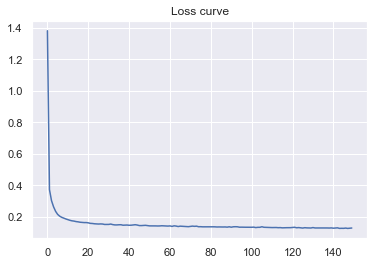

In [12]:
plot_costs(history.history["loss"])

The model can also be evaluated on the test set with familiar code.

In [13]:
y_pred = model.predict(X_test)
y_pred = np.array(y_pred > 0.5, dtype=int).squeeze()

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: %.4f" % accuracy)
print("F1: %.4f" % f1)

Accuracy: 0.9488
F1: 0.6817
